In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, make_scorer, recall_score, brier_score_loss
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# libraries for cleaning
import re
import nltk
nltk.download("stopwords") # helps us get rid of stop words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# tensor flow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# BERT stuff
import tensorflow_hub as hub
!pip install bert-for-tf2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=9d99c97a6c6a29d0c790194c26569a0bea8270350b4cb412e56206dda159644b
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=e492628a0a97482d77dcc7fb14b956e10f7daae694c2aa3d0c725f980bc88d66
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=4fce759d8b8b5192db0b54fbd0a19e4fa4c5f112ad2aaa701143dc609550528a
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 

In [2]:
!pip install tf-nightly
!pip install -q -U tensorflow-text-nightly
!pip install -q tf-models-official
!pip install tensorflow_text
import tensorflow_text as text
from official.nlp import optimization # to create the AdamW optimizer


     |████████████████████████████████| 456.6MB 36kB/s 
     |████████████████████████████████| 1.3MB 35.0MB/s 
     |████████████████████████████████| 5.5MB 32.0MB/s 
     |████████████████████████████████| 4.2MB 18.2MB/s 
     |████████████████████████████████| 471kB 46.9MB/s 
  Created wheel for clang: filename=clang-5.0-cp37-none-any.whl size=30696 sha256=4ed03038785a269c5d2175e38d0d57a34a9c5f821cffc31aed175bd92a97da01
  Stored in directory: /root/.cache/pip/wheels/a1/d0/fb/f47e814ad88e0741b0ff6fc57bc4044f61c44cb707a68de6b3
Successfully built clang
ERROR: tensorflow 2.5.0 has requirement grpcio~=1.34.0, but you'll have grpcio 1.38.1 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement keras-nightly~=2.5.0.dev, but you'll have keras-nightly 2.6.0.dev2021062500 which is incompatible.
  Found existing installation: keras-nightly 2.5.0.dev2021032900
    Uninstalling keras-nightly-2.5.0.dev2021032900:
      Successfully uninstalled keras-nightly-2.5.0.dev2021032900
  Found exi

     |████████████████████████████████| 4.3MB 5.4MB/s 
     |████████████████████████████████| 1.6MB 7.0MB/s 
     |████████████████████████████████| 686kB 24.2MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 215kB 29.1MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 358kB 27.1MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 645kB 35.3MB/s 
     |████████████████████████████████| 1.2MB 46.6MB/s 
     |████████████████████████████████| 38.2MB 203kB/s 
     |████████████████████████████████| 4.0MB 29.2MB/s 
     |████████████████████████████████| 1.2MB 30.3MB/s 
ERROR: tf-nightly 2.7.0.dev20210626 has requirement grpcio<2.0,>=1.37.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tf-nightly 2.7.0.dev20210626 has requirement keras-nightly~=2.6.0.dev, but you'll have keras-nightly 2.5.0.dev2021032900 which is incompatible.
  

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/UBDC_2021/Datasets/CoAID-master/Tweets Only/hydrated/cleaned_words.csv")
#df = pd.read_csv("combined_df_label.csv")

df = pd.read_csv("/content/drive/MyDrive/UBDC_2021/Final/text_preprocessed.csv")
df = df.loc[:,["text","label"]]
df.head()

Mounted at /content/drive


,text,label
0,coronavirus outbreak live updates odisha conf...,0
1,for today may here s how to follow the lat...,0
2,coronavirus outbreak round the clock updates ...,0
3,watch live gov phil murphy will speak at p...,0
4,to all my friends in the people s republic of ...,0


**IMPORTANT**: 

- real news = 0
- fake news = 1 

https://www.sciencedirect.com/science/article/abs/pii/S1532046420301672

In [4]:
df.dropna(inplace = True)
df.head()

,text,label
0,coronavirus outbreak live updates odisha conf...,0
1,for today may here s how to follow the lat...,0
2,coronavirus outbreak round the clock updates ...,0
3,watch live gov phil murphy will speak at p...,0
4,to all my friends in the people s republic of ...,0


BERT is a transformer encoder architecture that computes vector-space representations of natural language for deep learning models. The BERT family of models uses the Transformer encoder architecture to process each token of input text within the full context of the tokens before and afterwards. So that's why its called a *Bidirectional* encoder.

In [5]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=0)


# create a tf.data.Dataset object for easier iteration 
# it will give outputs as a tuple of (text (ie X_train/test),label (ie y_train/test))
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [6]:
# shuffle data for training and make bathes
buffer_size = 10000
batch_size = 64

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

In [7]:
# let's look at a few reviews
for text_batch, label_batch in train_dataset.take(1):
  for i in range(3):
    print(f"Review: {text_batch.numpy()[i]}")
    label = label_batch.numpy()[i]
    print(f"Label: {label}")

Review: b'the lancet retracts large study on hydroxychloroquine  via  nbcnews'
Label: 0
Review: b' officialozfm my lazy girl  charlie   '
Label: 0
Review: b'covid     the immune system can fight back    sciencedaily '
Label: 0


In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size = AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size = AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size = AUTOTUNE)

Now we need to choose a BERT model to download and fine tune. We will start with a Small BERT since they are faster to fine tune. Remember to cite this model: 

@article{turc2019,
  title={Well-Read Students Learn Better: On the Importance of Pre-training Compact Models},
  author={Turc, Iulia and Chang, Ming-Wei and Lee, Kenton and Toutanova, Kristina},
  journal={arXiv preprint arXiv:1908.08962v2 },
  year={2019}
}

In [9]:
# use the small bert model with layers (L) = 2 and hidden size (H) = 256 (next smallest model)
#'small_bert/bert_en_uncased_L-2_H-256_A-4':
tfhub_handle_encoder =    'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1'
tfhub_handle_preprocess =  'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [10]:
# now the data will need to be preprocessed according to the model chosen
# we do this step below

bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [11]:
# an example of the preprocessing at work 
testing = X_train[:1]
print(testing)

testing_preprocessed = bert_preprocess_model(testing)
print(f"Keys: {list(testing_preprocessed.keys())}")
print(f'Shape      : {testing_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {testing_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {testing_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {testing_preprocessed["input_type_ids"][0, :12]}')


133634    the lancet retracts large study on hydroxychlo...
Name: text, dtype: object
Keys: ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [  101  1996  9993  2102  2128  6494 16649  2312  2817  2006 18479 18037]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


From the output above we can see that the input is truncated to 128 tokens. The number of tokens can be customized but I think it requires a TPU so won't try that at the moment. I can always just change the BERT model from L-128 to 512 etc if needed.

Also the input_type_ids only have one value (0) because this is a single sentence input. If we had a multi-sentence input then we would have one number of each input. 

We test the model on a sentence and see the results below. The model returns a map with three important keys: `pooled output`, `sequence_output`, `encoder_outputs`. 

- Pooled output represents each input sequence as a whole. This can be thought of as an embedding for the entire tweet 
- Sequence output represents each input token in the context of the sentence. The shape is [batch size, seqeunce_length, H]
  - This can be thought of as the contextual embedding for every *token* in the tweet
- encoder outputs are the intermediate activations of the L transformer blocks. 

For fine tuning the BERT model we will focus on the pooled_output array.



In [12]:
# now let's look at the actual BERT model before applying it to the data
bert_model = hub.KerasLayer(tfhub_handle_encoder)
bert_results = bert_model(testing_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Pooled Outputs Shape:(1, 256)
Pooled Outputs Values:[ 0.98976326  0.14495203 -0.3518461   0.5549022  -0.05640775  0.9988332
 -0.98497224  0.07462531 -0.67365795 -0.23343067  0.9864472  -0.71349496]
Sequence Outputs Shape:(1, 128, 256)
Sequence Outputs Values:[[ 0.11163507 -1.3912762   1.3914396  ... -0.15090318 -0.40463668
  -2.5925055 ]
 [-0.9173158  -1.163545    0.66035205 ...  0.9854108   0.43702057
  -1.0681549 ]
 [-1.1829543  -1.1314902   0.41951218 ...  0.79968065  0.6065214
  -1.0567974 ]
 ...
 [ 0.9586689  -1.0561616   1.3496548  ...  0.01188135 -0.04091799
  -0.9299674 ]
 [-0.2393159  -0.5035601  -0.02199722 ... -1.3017322  -0.5377648
  -0.7710125 ]
 [-0.40345305 -0.00281899  1.4996073  ... -0.8925129   0.06047513
  -0.48134637]]


Now we will create a simple fined tuned model with the preprocessnig model, the selected BERT model, one Dense, and a Dropout layer. 

In [13]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = "text") # create an input layer
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name = "preprocessing") # create the preprocessing layer
  encoder_inputs = preprocessing_layer(text_input) # apply the preprocessing to the inputs to get them ready to use in the encoder
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable = True, name = "BERT_encoder") # create the encoder
  outputs = encoder(encoder_inputs) # input into the encoder layer 
  net = outputs["sequence_output"] # retrieve the sequence outputs 
  net = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(batch_size))(net) # create the RNN layer
  net = tf.keras.layers.Dense(batch_size, activation = "relu", name = "dense_layer_1")(net) # create dense layer
  #net = tf.keras.layers.Dropout(0.1)(net) # dropout layer should go after activation function
  net = tf.keras.layers.Dense(1, activation = None, name = "classifier")(net) # create the dense layer
  return tf.keras.Model(text_input, net) # return the text you inputted and the final model (called net)


In [14]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs")

In [15]:
classifier_model = build_classifier_model()
print(classifier_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
preprocessing (KerasLayer)      {'input_word_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
BERT_encoder (KerasLayer)       {'sequence_output':  9591041     preprocessing[0][0]              
                                                                 preprocessing[0][1]              
                                                                 preprocessing[0][2]              
______________________________________________________________________________________________

tf.Tensor([[0.64504915]], shape=(1, 1), dtype=float32)


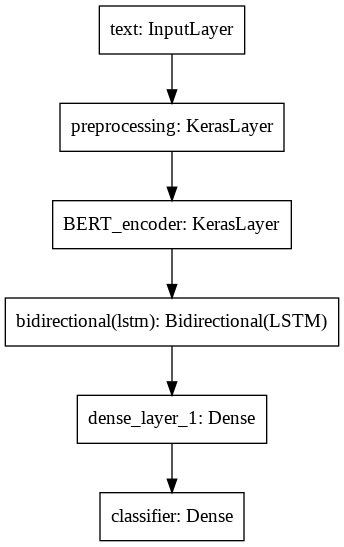

In [16]:
# let's test the model on something meaningless
bert_raw_result = classifier_model(tf.constant(testing))
print(tf.sigmoid(bert_raw_result)) # the output rn is meaningless because model is not trained
# let's look at the model structure
tf.keras.utils.plot_model(classifier_model)

Because this is a binary classification problem and the model outputs a probability we need to us the `losses.BinaryCrossentropy` loss function. 

For fine tuning we will use the same optimizer that BERT was originally trained with (called `adam`). This optimizer will minimize the prediction loss and will do regularization by weight. 

With regars to the learning rate (denoted `init_lr`) we wil use the same schedule as BERT pre-training. 

In [17]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy() # will need to change this..

In [18]:
epochs = 3
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch*epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr, 
                                          num_train_steps=num_train_steps, 
                                          num_warmup_steps=num_warmup_steps, 
                                          optimizer_type = "adamw")

In [19]:
real = y_train.loc[y_train==0].shape[0]
fake = y_train.loc[y_train==1].shape[0]
print(f"real is {real}")
print(f"fake is {fake}")
print(f"% fake is {fake/(fake+real)*100}")
initial_bias = np.log(fake/real)
print(f"the initial bias is {initial_bias}")


# pass keras weight for each class so that the model pays attention to examples 
# from an underpresented class
total = real + fake
weight_0 = (1/real)*(total/2.0)
weight_1 = (1/fake)*(total/2.0)
class_weight = {0:weight_0, 1:weight_1}
print(f"Weight 0 clas is {weight_0}")
print(f"Weight 1 class is {weight_1}")

real is 118581
fake is 5990
% fake is 4.808502781546267
the initial bias is -2.985504859241621
Weight 0 clas is 0.5252569973267218
Weight 1 class is 10.398247078464108


In [20]:
# load the bert model and train 
classifier_model.compile(optimizer=optimizer, 
                         loss = loss, # binary cross entropy
                         metrics = metrics) # binary accuracy
print(f"Training the model with: {tfhub_handle_encoder}")
history = classifier_model.fit(x=train_dataset, validation_data=val_dataset, 
                               epochs = epochs, callbacks  = [tb_callback], 
                                class_weight=class_weight)

Training the model with: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1947/1947 [==============================] - ETA: 0s - loss: 0.3941 - binary_accuracy: 0.9249WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f14b6b899e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1947/1947 [==============================] - 6359s 3s/step - loss: 0.3941 - binary_accuracy: 0.9249 - val_loss: 0.1270 - val_binary_accuracy: 0.9678
Epoch 2/3
1947/1947 [==============================] - 6384s 3s/step - loss: 0.2362 - binary_accuracy: 0.9687 - val_loss: 0.0662 - val_binary_accuracy: 0.9818
Epoch 3/3
1947/1947 [==============================] - 6342s 3s/step - loss: 0.2154 - binary_accuracy: 0.9806 - val_loss: 0.0851 - val_binary_accuracy: 0.9765


In [21]:
# evaluate the model 
loss, acc = classifier_model.evaluate(test_dataset)
print(f"The loss is {loss}")
print(f"The accuracy is {acc}")

866/866 [==============================] - 737s 851ms/step - loss: 0.0898 - binary_accuracy: 0.9756
The loss is 0.08983425050973892
The accuracy is 0.9755987524986267


In [22]:
# export the model 
dataset_name = "covid_tweets"
saved_model_path = "./{}_bert".format(dataset_name.replace("/","_"))
classifier_model.save("/content/drive/MyDrive/UBDC_2021", include_optimizer = False)

Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f14b0e02ef0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f14b0e02ef0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f14b0e02ef0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/MyDrive/UBDC_2021/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/UBDC_2021/assets


In [23]:
# reload the model and make predictions 
#reload_model = tf.saved_model.load(saved_model_path)

# make predictions with the model in memory and create a report
from sklearn.metrics import classification_report
y_test_pred = tf.sigmoid(classifier_model.predict(test_dataset))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [24]:
y_test_pred_boolean = tf.greater(y_test_pred, 0.5) # adjust this later
print(classification_report(y_test, y_test_pred_boolean))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     52750
           1       0.68      0.81      0.74      2616

    accuracy                           0.97     55366
   macro avg       0.83      0.90      0.86     55366
weighted avg       0.98      0.97      0.97     55366



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.9731882147049873

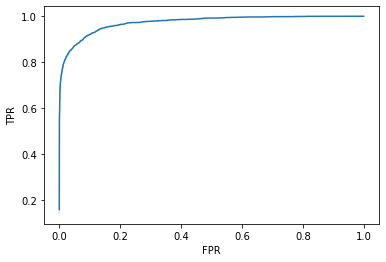

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
ax = sns.lineplot(fpr, tpr)
ax.set(xlabel = "FPR", ylabel = "TPR")
auc(fpr, tpr)

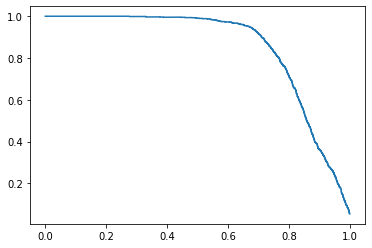

The AP score is 0.8523532171652042


In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
plt.plot(recall, precision)
plt.show()
from sklearn.metrics import average_precision_score
print(f"The AP score is {average_precision_score(y_test, y_test_pred)}")

In [27]:
test_final = pd.read_csv("/content/drive/MyDrive/UBDC_2021/Final/english_test_with_labels.csv")
test_final = test_final.iloc[:,1:]
print(test_final.head())
label_change = lambda x: 1 if x == "fake" else 0
y = test_final.iloc[:,1]
test_final.iloc[:,1] = y.map(label_change)
print(test_final.head())

X_test_final = test_final.iloc[:,0]
y_test_final = test_final.iloc[:,1]

# create a tf.data.Dataset object for easier iteration 
# it will give outputs as a tuple of (text (ie X_train/test),label (ie y_train/test))
final_test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test_final)).batch(batch_size)
X_test_final = final_test_dataset.map(lambda text, label: text)

y_test_pred = tf.sigmoid(classifier_model.predict(final_test_dataset))
y_test_pred_boolean = tf.greater(y_test_pred, 0.5) # adjust this later
print(classification_report(y_test_final, y_test_pred_boolean))

                                               tweet label
0  Our daily update is published. States reported...  real
1             Alfalfa is the only cure for COVID-19.  fake
2  President Trump Asked What He Would Do If He W...  fake
3  States reported 630 deaths. We are still seein...  real
4  This is the sixth time a global health emergen...  real
                                               tweet  label
0  Our daily update is published. States reported...      0
1             Alfalfa is the only cure for COVID-19.      1
2  President Trump Asked What He Would Do If He W...      1
3  States reported 630 deaths. We are still seein...      0
4  This is the sixth time a global health emergen...      0
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      1120
           1       0.96      0.23      0.38      1020

    accuracy                           0.63      2140
   macro avg       0.78      0.61      0.56      2140
weighted avg  

In [28]:
random_text = "Please get vaccinated - it'll stop the spread"
random_text = np.array([random_text])
print(classifier_model(tf.constant(random_text)))
print(tf.sigmoid(classifier_model(tf.constant(random_text))))

random_text = "fauci and bill gates want to ban hydroxychloroquine"
random_text = np.array([random_text])
print(classifier_model(tf.constant(random_text)))
print(tf.sigmoid(classifier_model(tf.constant(random_text))))

random_text = "We need lockdowns! COVID-19 isn't just the flu!"
random_text = np.array([random_text])
print(classifier_model(tf.constant(random_text)))
print(tf.sigmoid(classifier_model(tf.constant(random_text))))

random_text = "More lockdowns more problems - the elite are trying to trap us"
random_text = np.array([random_text])
print(classifier_model(tf.constant(random_text)))
print(tf.sigmoid(classifier_model(tf.constant(random_text))))

tf.Tensor([[3.1859179]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.9603009]], shape=(1, 1), dtype=float32)
tf.Tensor([[6.4227476]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.9983785]], shape=(1, 1), dtype=float32)
tf.Tensor([[-2.9010103]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.05210364]], shape=(1, 1), dtype=float32)
tf.Tensor([[-4.533204]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.01063198]], shape=(1, 1), dtype=float32)


In [29]:
# !pip uninstall bert
# !pip uninstall bert-for-tf2
# !pip uninstall bert-tensorflow

In [30]:
#!pip install bert-for-tf2
#!pip install bert-tensorflow

In [31]:
X = df.text
y = df.label
full_dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(batch_size).cache().prefetch(buffer_size = AUTOTUNE)
all_y = tf.sigmoid(classifier_model.predict(full_dataset))
df["probabilities"] = all_y
print(df.info())
df.to_csv("bert_probabilities.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221461 entries, 0 to 221460
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   text           221461 non-null  object
 1   label          221461 non-null  int64 
 2   probabilities  221461 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.8+ MB
None


In [44]:
!pip uninstall bert-for-tf2

Uninstalling bert-for-tf2-0.14.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/bert/*
    /usr/local/lib/python3.7/dist-packages/bert_for_tf2-0.14.9.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled bert-for-tf2-0.14.9


In [45]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 3.6MB/s 


In [47]:
# # embedding layer = encoder = outputs[sequence_weights] = weights
# # just not sure how to get the vocabulary...
# from bert import tokenization
# import io
# weights = classifier_model.get_layer("BERT_encoder").get_weights()[0]
# print(weights)
# with open("/content/drive/MyDrive/UBDC_2021/Final/weights.txt", 'w') as file:
#   for row in weights:
#         file.write(str(row) + '\n')

# vocab_file = classifier_model.get_layer("BERT_encoder").resolved_object.vocab_file.asset_path.numpy()
# print(vocab_file)

# out_path = '/content/drive/MyDrive/UBDC_2021/Final/bertvocab.txt'
# # save the file 
# with open(vocab_file, "rb") as in_file, open(out_path, "wb") as out_file:
#     out_file.write(in_file.read())
    
# vocab_file = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)
# out_vector = io.open("vectors.tsv","w",encoding = "utf-8")
# out_meta = io.open("metadata.tsv", "w", encoding = "utf-8")

# for i, word in enumerate(vocab_file):
#   if i==0:
#     continue # 0 is padding so we skip
#   vec = weights[i]
#   out_vector.write("\t".join([str(x) for x in vec]) + "\n")
#   out_meta.write(word + "\n")
# out_vector.close()
# out_meta.close()

# # download to colab
# try: 
#   from google.colab import files
#   files.download("vectors.tsv")
#   files.download("metadata.tsv")
# except Exception: 
#   pass

Example to follow: https://keras.io/examples/nlp/text_classification_from_scratch/


https://github.com/tensorflow/tensorflow/issues/35876

The graphs show us that we actually only really need to train this model for three epochs - any more and we are overfitting our data. 